# Plotting a time series from the MLML seawater intake

This notebook provides an introduction to loading text data, working with dates and plotting data in Python, using data from the Moss Landing Marine Labs seawater intake.

The seawater intake is located offshore of Moss Landing, CA in 17m water depth. More information can be found at http://seawater.mlml.calstate.edu/index.php

First step: load modules:
* The *%matplotlib notebook* command generates interactive plots in a notebook
* The *pyplot* module is for plotting. 
* The *datetime* module provides a consistent format for working with dates in Python. 
* The *dates* module has functions for converting between datetime format and serial date numbers.

In [22]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates

### Importing data

The seawater intake data is stored in csv format and publicly available at http://pubdata.mlml.calstate.edu/mlml_last/seawater/ Each file contains one month of data. Here the numeric data in the text file is loaded into a Python variables. However, this command does not recognize strings by default (only numeric data). Notice that the first two columns, which contain the dates in the data file, are listed as "nan" or "not a number".

In [23]:
file_path = 'data/MLML_Seawater/2014-06.csv'

# load numeric data into one big array with many columns
data = np.genfromtxt(file_path,delimiter=',',skip_header=1)
wtemp = data[:,3] # this column contains the temperature data
print(data[0,:]) # print the first row of data

[             nan              nan   1.40160986e+09   1.23718964e+01
   1.00000000e+00   8.98570839e-01   1.00000000e+00   3.32668244e+01
   1.00000000e+00   4.84609524e-01   1.00000000e+00   1.20500000e+01
   1.00000000e+00   1.20500000e+02   1.00000000e+00   1.89698239e+00
   1.00000000e+00   8.27208715e+01   1.00000000e+00   4.41200000e+01
   1.00000000e+00   4.93000000e+00  -9.99990000e+04   4.00000000e+00
   2.62000000e+00]


To get the dates, you can use the same np.genfromtxt function, but select only a column containing dates and specify that it is a string (not numeric data).

In [24]:
# load column containing date strings, specify stting data type
date_strings= np.genfromtxt(file_path,delimiter=',',skip_header=1,usecols=(1),dtype='S')

# show the first date in the date_strings variable
print('string format')
print(type(date_strings[0]))
print(date_strings[0])

string format
<type 'numpy.string_'>
2014-06-01 00:04:20


### Working with dates
In Python, dates can be expressed in a number of different formats. Strings are easy for humans to read but they are not always presented in a consistent way. The datetime format is particularly provides a consistent format that Python can easily recognize and work with. Strings can be converted to the datetime format with the datetime.strptime command (which is short for "string parse time").

In [25]:
# put the first date into Python datetime format
date1 = datetime.strptime(date_strings[0],'%Y-%m-%d %H:%M:%S') 

print('Python datetime format')
print(type(date1))
print(date1)

Python datetime format
<type 'datetime.datetime'>
2014-06-01 00:04:20


With the datetime format, it is easy to get just the year, month, etc.

In [26]:
print('year:')
print(date1.year)
print('month:')
print(date1.month)

year:
2014
month:
6


The date can also be expressed as a serial date number. In Python, the date number indicates  (days since Jan-01-0001 00:00:00)+1. Decimals indicate fractions of days.

In [27]:
# convert from datetime format to serial date number
datenum1 = dates.date2num(date1)

print('Python serial datenumber')
print(type(datenum1))
print(datenum1)

Python serial datenumber
<type 'float'>
735385.003009


### Creating a list of dates
A for loop can be used to go through each date string and convert them to the datetime format.

In [28]:
dlist = [] # create empty list for dates
for dstring in date_strings:  # loop through each date
    d = datetime.strptime(dstring,'%Y-%m-%d %H:%M:%S')  # convert date string to datetime format
    dlist.append(d) # append to list

### Plotting time series
The datetime format is recognized by Python plotting commands. The dates are automatically labeled on the x-axis.

<IPython.core.display.Javascript object>


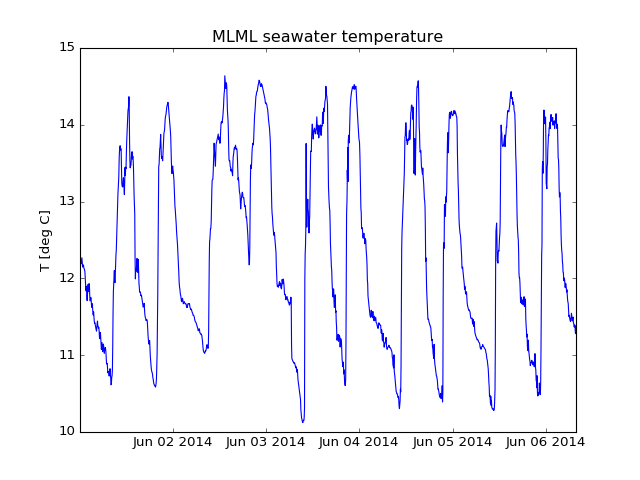

In [29]:
# plot a segment of the temperature time series
plt.plot(dlist[1:1500],wtemp[1:1500])
plt.ylabel('T [deg C]')
plt.title('MLML seawater temperature')